In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import quote
import matplotlib as mpl
import numpy as np

In [16]:
files_of_park = pd.read_csv('서울공원 정리.csv')

In [17]:
df = files_of_park.groupby('지역')[['면적']].agg(['sum','count'])
df

면적      
              sum count
지역                     
강남구    3626398.50     7
강동구    1526389.30     7
강북구    3714902.40     4
강서구    2194154.10     9
과천시    9132690.00     1
관악구   10431453.08     2
광진구     584002.00     2
구로구    1617657.00     4
금천구      57568.00     4
노원구   12024307.30     2
도봉구    1084218.00     6
동대문구    458663.70     4
동작구    3706739.10     7
마포구    2685112.70     5
서대문구   3321476.62     4
서초구   13359636.00     6
성동구     626838.70     5
성북구    1198327.00     3
송파구    2838992.80     7
양천구    1203428.50     5
영등포구    424446.00     5
용산구     247194.10     2
은평구    2986459.00     7
종로구    3907680.57    12
중구     2943303.80     4
중랑구    7078975.00     6

In [18]:
df.drop(index='과천시', inplace=True)
df.columns = ['공원면적', '공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398.50,7
강동구,1526389.30,7
강북구,3714902.40,4
강서구,2194154.10,9
관악구,10431453.08,2


In [19]:
seoul_gu_df= pd.read_csv('report.txt', sep='\t')
seoul_gu_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605.23,"16,376"
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"


In [20]:
seoul_gu_df.drop(index=0, inplace=True)

In [21]:
seoul_gu_df.set_index('지역', inplace=True)

In [22]:
df = df.join(seoul_gu_df[['인구','면적']])

In [23]:
df['인구'] = df.인구.apply(lambda x: int(x.replace(',','')))


In [24]:
df['면적'] = df.면적 * 1000000

In [25]:
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구

C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\igksj\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text

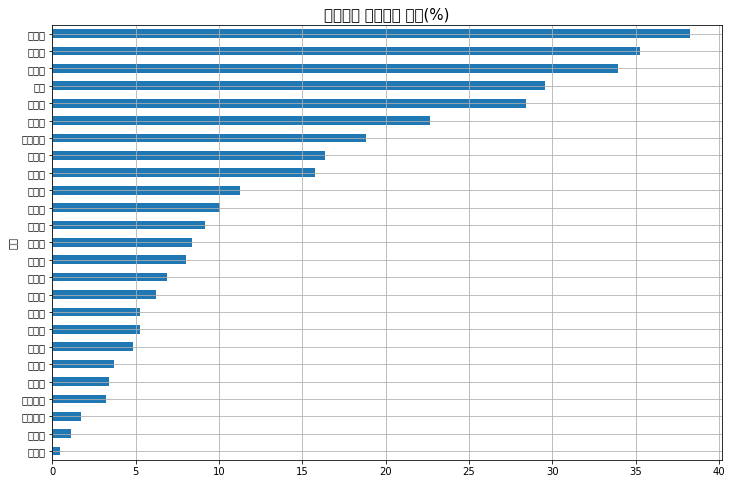

In [26]:
df.면적비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
order = df.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

In [ ]:
df.인당면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
order = df.인당면적.sort_values(ascending=False).index
sns.barplot(x='인당면적', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

In [27]:
df.to_csv('자치구별 공원 현황')